Nama : Tiara Lailatul Nikmah  
Username : Tiara Laila  
Email : tiaralaila21@gmail.com  
Asal kota : Juwana, Pati

In [1]:
# install the Kaggle API client
! pip install -q kaggle

In [2]:
# Unggah file kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tiaralailatulnikmah","key":"e83b812efdaf93d18a37ffd6a6a83f08"}'}

In [3]:
# set up kaggle API
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# mendownload dataset dari kaggle
!kaggle datasets download -d grouplens/movielens-20m-dataset

 95% 186M/195M [00:01<00:00, 129MB/s]
100% 195M/195M [00:01<00:00, 136MB/s]


In [5]:
# mengecek dataset yang telah terunduh
!ls

kaggle.json  movielens-20m-dataset.zip	sample_data


In [6]:
# melakukan unzip pada dataset yang telah di download
!unzip /content/movielens-20m-dataset.zip

Archive:  /content/movielens-20m-dataset.zip
  inflating: genome_scores.csv       
  inflating: genome_tags.csv         
  inflating: link.csv                
  inflating: movie.csv               
  inflating: rating.csv              
  inflating: tag.csv                 


In [7]:
# mendefinisikan setiap file
import pandas as pd
 
link = pd.read_csv('/content/link.csv')
movie = pd.read_csv('/content/movie.csv')
rating = pd.read_csv('/content/rating.csv')
tag = pd.read_csv('/content/tag.csv')
genome_scores = pd.read_csv('/content/genome_scores.csv')
genome_tags = pd.read_csv('/content/genome_tags.csv')

# melihat jumlah data unik setiap file menggunakan movieId dan userId nya
print('Jumlah tautan yang dapat digunakan untuk menautkan ke sumber lain:: ', len(link.movieId.unique()))
print('Jumlah data terdiri dari informasi utama tentang film: ', len(movie.movieId.unique()))
print('Jumlah data rating film: ', len(rating.userId.unique()))
print('Jumlah data yang berisi tag yang diterapkan ke film oleh pengguna: ', len(tag.userId.unique()))
print('Jumlah data yang berisi data relevansi tag film : ', len(genome_scores.movieId.unique()))
print('Jumlah data yang berisi deskripsi tag:: ', len(genome_tags.tagId.unique()))

Jumlah tautan yang dapat digunakan untuk menautkan ke sumber lain::  27278
Jumlah data terdiri dari informasi utama tentang film:  27278
Jumlah data rating film:  138493
Jumlah data yang berisi tag yang diterapkan ke film oleh pengguna:  7801
Jumlah data yang berisi data relevansi tag film :  10381
Jumlah data yang berisi deskripsi tag::  1128


# **Univariate Exploratory Data Analysis**

# **Movie Variabel**

In [8]:
# melihat info dataset movie
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [9]:
# melihat jumlah data unik dari judul film dan genre
print('Banyak data: ', len(movie.movieId.unique()))
print('Jumlah judul film: ', len(movie.title.unique()))
print('Judul film: ', movie.title.unique())
print('Jumlah jenis genre dari film: ', len(movie.genres.unique()))
print('Genre film: ', movie.genres.unique())

Banyak data:  27278
Jumlah judul film:  27262
Judul film:  ['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)' ...
 'The Pirates (2014)' 'Rentun Ruusu (2001)' 'Innocence (2014)']
Jumlah jenis genre dari film:  1342
Genre film:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' ...
 'Action|Adventure|Animation|Fantasy|Horror'
 'Animation|Children|Comedy|Fantasy|Sci-Fi'
 'Animation|Children|Comedy|Western']


## **Ratings Variable**

In [10]:
# melihat info dataset rating
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [11]:
# melihat data ratings 5 teratas
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [12]:
# elihat distribusi rating pada data
rating.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


nilai maksimum rating adalah 5 dan nilai minimumnya adalah 0.5 Artinya, skala rating berkisar antara 0.5 hingga 5. 

In [13]:
# Untuk melihat berapa pengguna yang memberikan rating, jumlah film, dan jumlah rating
print('Jumlah userID: ', len(rating.userId.unique()))
print('Jumlah movieID: ', len(rating.movieId.unique()))
print('Jumlah data rating: ', len(rating))

Jumlah userID:  138493
Jumlah movieID:  26744
Jumlah data rating:  20000263


# **Data Preprocessing**

In [14]:
# mengecek apakah ada nilai yang hilang
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

## **Menggabungkan Data Film**

In [15]:
# import library
import numpy as np
 
# Menggabungkan seluruh id pada kategori Movie
movie_all = np.concatenate((
    movie.movieId.unique(),
    link.movieId.unique()
))
 
# Mengurutkan data dan menghapus data yang sama
movie_all = np.sort(np.unique(movie_all))
 
print('Jumlah seluruh data film berdasarkan id: ', len(movie_all))

Jumlah seluruh data film berdasarkan id:  27278


## **Menggabungkan Data User**

In [16]:
# import library
import numpy as np
 
# Menggabungkan seluruh id pada kategori user
user_all = np.concatenate((
    rating.userId.unique(),
    tag.userId.unique()
)) 
# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all)) 
 
print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  138493


## **Mengetahui Jumlah Rating**
Untuk mengetahui jumlah seluruh rating dari berbagai file

In [17]:
# Menggabungkan dataframe rating dengan movie_info berdasarkan nilai movieID
data_movie= pd.merge(rating, movie , on='movieId', how='left')
data_movie

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00,Up (2009),Adventure|Animation|Children|Drama
20000259,138493,69526,4.5,2009-12-03 18:31:48,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX
20000260,138493,69644,3.0,2009-12-07 18:10:57,Ice Age: Dawn of the Dinosaurs (2009),Action|Adventure|Animation|Children|Comedy|Rom...
20000261,138493,70286,5.0,2009-11-13 15:42:24,District 9 (2009),Mystery|Sci-Fi|Thriller


In [18]:
# Cek missing value dengan fungsi isnull()
data_movie.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

## **Menggabungkan Data dengan Fitur Nama dan Genre Film**

In [19]:
# Definisikan dataframe rating ke dalam variabel movie_rate dan menghapus kolom 'timestamp' yang tidak diperlukan
rating.drop(['timestamp'], axis=1, inplace=True)
rating

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


In [20]:
# mendefinisikan dataset rating menjadi movie_rate
movie_rate = rating
movie_rate

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


In [21]:
# Menggabungkan rating dengan dataframe movie berdasarkan movieId
all_movie = pd.merge(movie_rate, movie, on='movieId', how='left')
 
# Print dataframe all_movie_name
all_movie

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
20000258,138493,68954,4.5,Up (2009),Adventure|Animation|Children|Drama
20000259,138493,69526,4.5,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX
20000260,138493,69644,3.0,Ice Age: Dawn of the Dinosaurs (2009),Action|Adventure|Animation|Children|Comedy|Rom...
20000261,138493,70286,5.0,District 9 (2009),Mystery|Sci-Fi|Thriller


## **Mengambil sampel data**

In [22]:
# Mengambil sampel 50.000 record data saja
all_movie = all_movie[:50000]
all_movie

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
49995,370,55830,4.0,Be Kind Rewind (2008),Comedy
49996,370,56003,1.0,Southland Tales (2006),Comedy|Drama|Sci-Fi|Thriller
49997,370,56152,4.0,Enchanted (2007),Adventure|Animation|Children|Comedy|Fantasy|Mu...
49998,370,56156,2.0,Hitman (2007),Action|Crime|Thriller


# **Membagi fitur dataset**

In [23]:
# bagi fitur pada dataset menjadi dua bagian
numerical_features = ['rating']
categorical_features = ['title', 'genres', tag['tag']]

# **Visualisasi Data**

                                       jumlah sampel  persentase
Pulp Fiction (1994)                              187         0.4
Forrest Gump (1994)                              182         0.4
Jurassic Park (1993)                             157         0.3
Shawshank Redemption, The (1994)                 157         0.3
Silence of the Lambs, The (1991)                 153         0.3
...                                              ...         ...
My Name Is Bruce (2007)                            1         0.0
Immediate Family (1989)                            1         0.0
Rapture, The (1991)                                1         0.0
Hound of the Baskervilles, The (1939)              1         0.0
Lost in Austen (2008)                              1         0.0

[6470 rows x 2 columns]


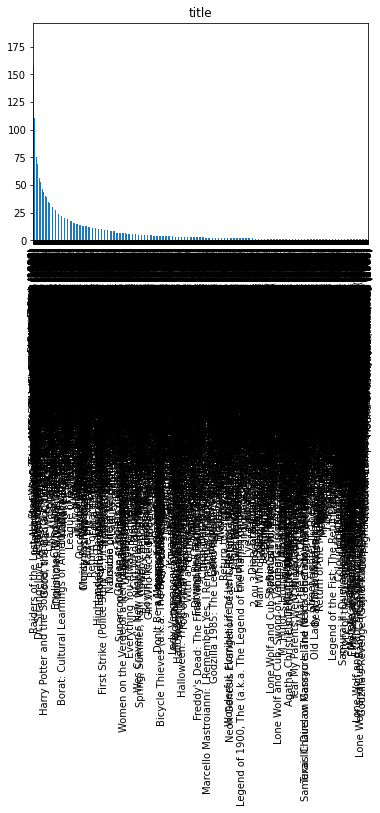

In [24]:
# Fitur Title
feature = categorical_features[0]
count = all_movie[feature].value_counts()
percent = 100*all_movie[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                                  jumlah sampel  persentase
Drama                                      3666         7.3
Comedy                                     3380         6.8
Comedy|Romance                             2047         4.1
Comedy|Drama                               1666         3.3
Comedy|Drama|Romance                       1506         3.0
...                                         ...         ...
Action|Horror|Sci-Fi|War                      1         0.0
Adventure|Romance|Sci-Fi|IMAX                 1         0.0
Children|Horror|Mystery|Thriller              1         0.0
Crime|Documentary                             1         0.0
Action|Animation|Comedy|Sci-Fi                1         0.0

[764 rows x 2 columns]


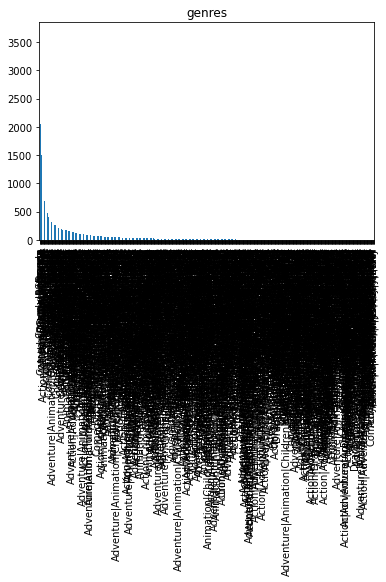

In [25]:
# Fitur Genre
feature = categorical_features[1]
count = all_movie[feature].value_counts()
percent = 100*all_movie[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

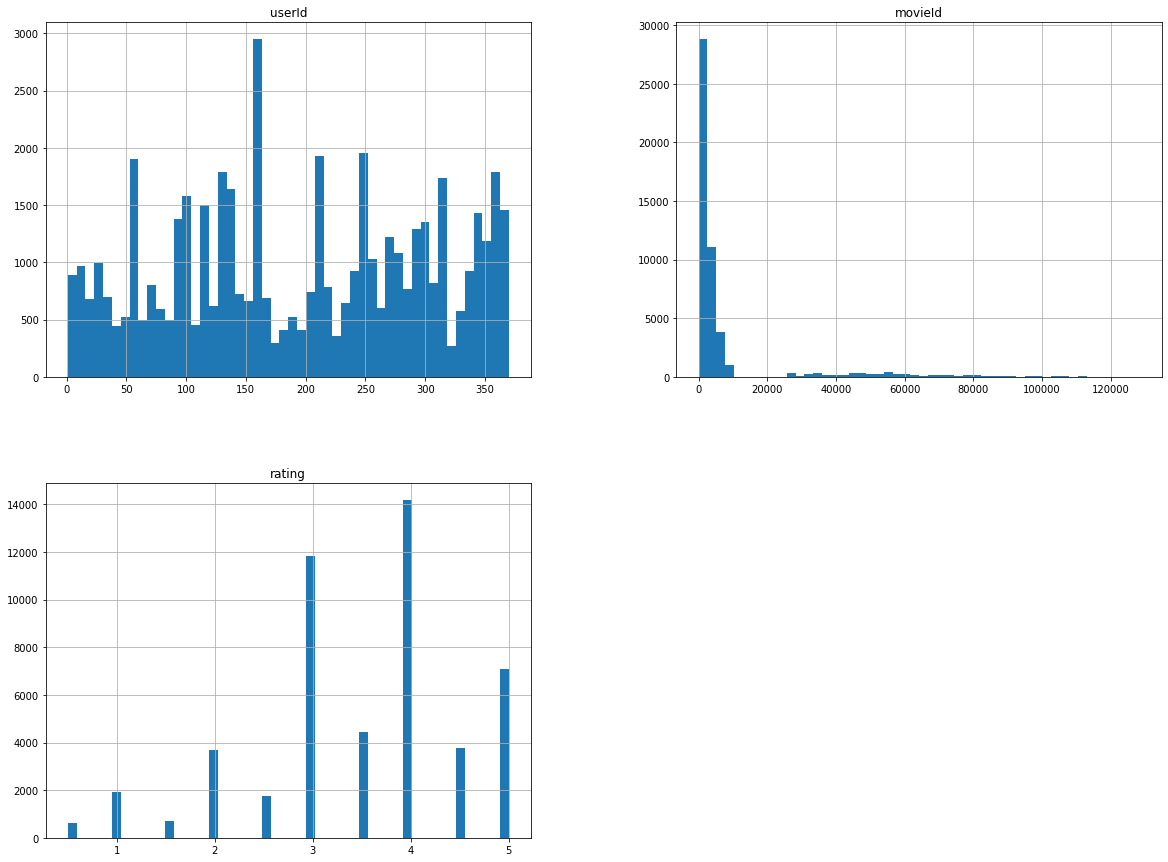

In [26]:
# histogram masing-masing fitur numerik
import matplotlib.pyplot as plt
all_movie.hist(bins=50, figsize=(20,15))
plt.show()

# **Data Preparation**




## **Mengatasi Missing Value**

In [27]:
# Mengecek missing value pada dataframe all_movie
all_movie.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

## **Menyamakan Jenis Genre**

In [28]:
# Mengurutkan movie berdasarkan movieID kemudian memasukkannya ke dalam variabel fix_movie
fix_movie = all_movie.sort_values('movieId', ascending=True)
fix_movie

,userId,movieId,rating,title,genres
3903,34,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
19783,155,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
19846,156,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1500,13,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1464,12,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
8059,71,117511,3.0,Hello Ladies: The Movie (2014),Comedy
8060,71,117590,3.5,Horrible Bosses 2 (2014),Comedy|Crime
3778,31,118696,5.0,The Hobbit: The Battle of the Five Armies (2014),Adventure|Fantasy
3779,31,125916,0.5,Fifty Shades of Grey (2015),Drama


In [29]:
# Mengecek berapa jumlah fix_movie
len(fix_movie.movieId.unique())

6471

In [30]:
# Mengecek kategori judul film yang unik
fix_movie.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Drama|Mystery', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Acti

In [31]:
# Membuat variabel preparation yang berisi dataframe fix_movie kemudian mengurutkan berdasarkan movieID
preparation = fix_movie
preparation.sort_values('movieId')

,userId,movieId,rating,title,genres
3903,34,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
41108,313,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
42613,325,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9494,90,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9621,91,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
8059,71,117511,3.0,Hello Ladies: The Movie (2014),Comedy
8060,71,117590,3.5,Horrible Bosses 2 (2014),Comedy|Crime
3778,31,118696,5.0,The Hobbit: The Battle of the Five Armies (2014),Adventure|Fantasy
3779,31,125916,0.5,Fifty Shades of Grey (2015),Drama


In [32]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,title,genres
3903,34,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
49529,369,2,4.0,Jumanji (1995),Adventure|Children|Fantasy
48734,367,3,3.0,Grumpier Old Men (1995),Comedy|Romance
7097,61,4,3.0,Waiting to Exhale (1995),Comedy|Drama|Romance
25591,206,5,3.5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
8059,71,117511,3.0,Hello Ladies: The Movie (2014),Comedy
8060,71,117590,3.5,Horrible Bosses 2 (2014),Comedy|Crime
3778,31,118696,5.0,The Hobbit: The Battle of the Five Armies (2014),Adventure|Fantasy
3779,31,125916,0.5,Fifty Shades of Grey (2015),Drama


In [33]:
# Mengonversi data series ‘MovieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()
 
# Mengonversi data series ‘Judul’ menjadi dalam bentuk list
movie_name = preparation['title'].tolist()
 
# Mengonversi data series ‘Genre’ menjadi dalam bentuk list
movie_genre = preparation['genres'].tolist()
 
print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

6471
6471
6471


In [34]:
# Membuat dictionary untuk data ‘movie_id’, ‘movie_name’, dan ‘genre’
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})
movie_new

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
6466,117511,Hello Ladies: The Movie (2014),Comedy
6467,117590,Horrible Bosses 2 (2014),Comedy|Crime
6468,118696,The Hobbit: The Battle of the Five Armies (2014),Adventure|Fantasy
6469,125916,Fifty Shades of Grey (2015),Drama


# **Model Development dengan Content Based Filtering**


## **TF-IDF Vectorizer**

Membangun sistem rekomendasi sederhana berdasarkan jenis genre dari film

In [35]:
# import library
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data genre
tf.fit(movie_new['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'horror',
 'imax',
 'musical',
 'mystery',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

Lakukan fit dan transformasi ke dalam bentuk matriks

In [36]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(movie_new['genre']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(6471, 21)

Menghasilkan vektor tf-idf dalam bentuk matriks

In [37]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.40049167, 0.5485382 , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.50556976, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.64153731, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.59252922, 0.        ,
         0.        ]])

Lihat matriks tf-idf untuk beberapa film (movie_name) dan kategori genre (genre)

In [38]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis genre
# Baris diisi dengan nama film
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=movie_new.movie_name
).sample(21, axis=1).sample(10, axis=0)

,romance,children,noir,film,thriller,war,western,fantasy,sci,action,fi,musical,mystery,crime,animation,comedy,imax,horror,adventure,drama,documentary
movie_name,,,,,,,,,,,,,,,,,,,,,
Half Nelson (2006),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0
Stuart Saves His Family (1995),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0
M (1931),0.000000,0.000000,0.631989,0.631989,0.289466,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.342621,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
"Third Miracle, The (1999)",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.000000,0.583234,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.656054,0.000000,0.0,0.0,0.478990,0.000000,0.0
Kissed (1996),0.842291,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.539023,0.0
City of Ember (2008),0.000000,0.545784,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.500603,0.0,0.500603,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.448233,0.000000,0.0
Help! (1965),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.904006,0.0,0.000000,0.000000,0.427519,0.0,0.0,0.000000,0.000000,0.0
Veronica Guerin (2003),0.000000,0.000000,0.000000,0.000000,0.592529,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.701337,0.000000,0.000000,0.0,0.0,0.000000,0.396278,0.0


## **Cosine Similarity**

Menghitung derajat kesamaan (similarity degree) antar film dengan teknik cosine similarity

In [39]:
# import library
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.79215907, 0.15904422, ..., 0.62426872, 0.        ,
        0.        ],
       [0.79215907, 1.        , 0.        , ..., 0.7880598 , 0.        ,
        0.        ],
       [0.15904422, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.62426872, 0.7880598 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.3962778 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.3962778 ,
        1.        ]])

In [40]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama movie
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_new['movie_name'], columns=movie_new['movie_name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap movie
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (6471, 6471)


movie_name,Ripley's Game (2002),High Society (1956),Gunfight at the O.K. Corral (1957),Knocked Up (2007),"Cat Concerto, The (1947)"
movie_name,,,,,
Love Actually (2003),0.254380,0.553587,0.0,1.000000,0.181023
Trembling Before G-d (2001),0.000000,0.000000,0.0,0.000000,0.000000
Monkeybone (2001),0.000000,0.127642,0.0,0.182295,0.614629
"Mystery, Alaska (1999)",0.000000,0.178018,0.0,0.254241,0.712014
"Stepford Wives, The (1975)",0.326914,0.000000,0.0,0.000000,0.000000
"Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)",0.278338,0.000000,0.0,0.229102,0.000000
Wonderland (1997),0.000000,0.158456,0.0,0.226302,0.146646
Octopussy (1983),0.449995,0.000000,0.0,0.000000,0.000000
Potiche (2010),0.000000,0.370079,0.0,0.528537,0.342498


## **Mendapatkan Rekomendasi**

In [41]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=movie_new[['movie_name', 'genre']], k=5):
    """
    Rekomendasi Film berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    nama_movie : tipe data string (str)
                Nama Film (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan movie sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [42]:
# melihat data film Fun and Fancy Free (1947)
movie_new[movie_new.movie_name.eq('Fun and Fancy Free (1947)')]

,id,movie_name,genre
2831,3759,Fun and Fancy Free (1947),Animation|Children|Musical


In [43]:
# Mendapatkan rekomendasi film yang mirip dengan Fun and Fancy Free (1947)
movie_recommendations('Fun and Fancy Free (1947)')

,movie_name,genre
0,Sleeping Beauty (1959),Animation|Children|Musical
1,"Three Caballeros, The (1945)",Animation|Children|Musical
2,Winnie the Pooh and the Blustery Day (1968),Animation|Children|Musical
3,Jonah: A VeggieTales Movie (2002),Animation|Children|Musical
4,Dumbo (1941),Animation|Children|Drama|Musical


## **Evaluasi Model**

In [44]:
# evaluasi model menggunakan metrik precision

# Precision = #of recommendation that are relevant/#of item we recommend
# Precision = 4/5 
# Precision = 80%

# **Model Development dengan Collaborative Filtering**
Tujuan : Menghasilkan rekomendasi sejumlah film yang sesuai dengan preferensi pengguna berdasarkan rating yang telah diberikan sebelumnya. Dari data rating pengguna mengidentifikasi film-film yang mirip dan belum pernah ditonton oleh pengguna untuk direkomendasikan.

# **Data Understanding**

In [45]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [46]:
# Membaca dataset
df = rating
df

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


# **Data Preparation**

## **Mengambil Data Sampel**

In [47]:
# Mengambil sampel 100.000 record data saja
df = df[:100000]
df

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
99995,702,1373,3.0
99996,702,1374,2.5
99997,702,1377,1.5
99998,702,1378,1.5


In [48]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
# print('list userId: ', user_ids)
 
# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
# print('encoded userId : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
# print('encoded angka ke userId: ', user_encoded_to_user)

In [49]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()
 
# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
 
# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
 
# Selanjutnya, petakan userId dan movieId ke dataframe yang berkaitan.
 
# Mapping userId ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)
 
# Mapping movieId ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [50]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

702
8227
Number of User: 702, Number of Movie: 8227, Min Rating: 0.5, Max Rating: 5.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


## **Membagi Data untuk Training dan Validasi**

In [51]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,user,movie
75721,545,219,3.0,544,4841
80184,578,253,4.5,577,8
19864,156,23,3.0,155,1679
76699,553,1722,3.0,552,1451
92991,648,541,4.0,647,15
...,...,...,...,...,...
6265,56,3160,4.0,55,1373
54886,394,8915,5.0,393,6796
76820,554,329,4.0,553,234
860,8,377,4.0,7,372


In [52]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 544 4841]
 [ 577    8]
 [ 155 1679]
 ...
 [ 553  234]
 [   7  372]
 [ 130  267]] [0.55555556 0.88888889 0.55555556 ... 0.77777778 0.77777778 0.33333333]


# **Proses Training**

In [53]:
# membuat class RecommenderNet
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

## **Training dan Evaluasi**
Evaluasi model menggunakan 3 metrik yaitu RSME, SME, dan MAE

**Metrik RSME**

In [54]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [55]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 10,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
8000/8000 [==============================] - 43s 5ms/step - loss: 0.6283 - root_mean_squared_error: 0.2288 - val_loss: 0.6107 - val_root_mean_squared_error: 0.2139
Epoch 2/10
8000/8000 [==============================] - 39s 5ms/step - loss: 0.6064 - root_mean_squared_error: 0.2055 - val_loss: 0.6068 - val_root_mean_squared_error: 0.2096
Epoch 3/10
8000/8000 [==============================] - 39s 5ms/step - loss: 0.6020 - root_mean_squared_error: 0.2007 - val_loss: 0.6056 - val_root_mean_squared_error: 0.2082
Epoch 4/10
8000/8000 [==============================] - 37s 5ms/step - loss: 0.5996 - root_mean_squared_error: 0.1978 - val_loss: 0.6055 - val_root_mean_squared_error: 0.2079
Epoch 5/10
8000/8000 [==============================] - 39s 5ms/step - loss: 0.5981 - root_mean_squared_error: 0.1959 - val_loss: 0.6059 - val_root_mean_squared_error: 0.2081
Epoch 6/10
8000/8000 [==============================] - 39s 5ms/step - loss: 0.5970 - root_mean_squared_error: 0.1946 - val_l

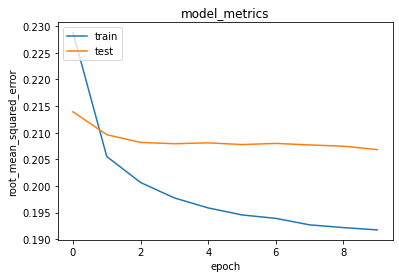

In [56]:
# visualisasi metrik
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Metrik MSE**

In [57]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanSquaredError()]
)

In [58]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 10,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
8000/8000 [==============================] - 39s 5ms/step - loss: 0.6279 - mean_squared_error: 0.0521 - val_loss: 0.6108 - val_mean_squared_error: 0.0458
Epoch 2/10
8000/8000 [==============================] - 36s 5ms/step - loss: 0.6065 - mean_squared_error: 0.0423 - val_loss: 0.6066 - val_mean_squared_error: 0.0438
Epoch 3/10
8000/8000 [==============================] - 36s 5ms/step - loss: 0.6019 - mean_squared_error: 0.0402 - val_loss: 0.6061 - val_mean_squared_error: 0.0435
Epoch 4/10
8000/8000 [==============================] - 38s 5ms/step - loss: 0.5999 - mean_squared_error: 0.0392 - val_loss: 0.6049 - val_mean_squared_error: 0.0429
Epoch 5/10
8000/8000 [==============================] - 38s 5ms/step - loss: 0.5981 - mean_squared_error: 0.0384 - val_loss: 0.6050 - val_mean_squared_error: 0.0429
Epoch 6/10
8000/8000 [==============================] - 38s 5ms/step - loss: 0.5973 - mean_squared_error: 0.0380 - val_loss: 0.6048 - val_mean_squared_error: 0.0428
Epoch 7/10

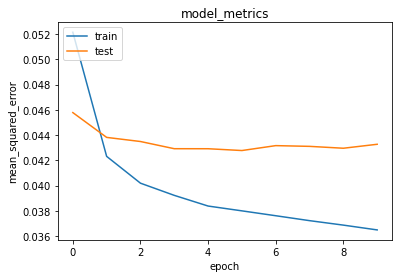

In [59]:
# Visualisasi Metrik
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Metrik MAE**

In [60]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

In [61]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 10,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
8000/8000 [==============================] - 39s 5ms/step - loss: 0.6278 - mean_absolute_error: 0.1821 - val_loss: 0.6108 - val_mean_absolute_error: 0.1681
Epoch 2/10
8000/8000 [==============================] - 35s 4ms/step - loss: 0.6065 - mean_absolute_error: 0.1605 - val_loss: 0.6069 - val_mean_absolute_error: 0.1643
Epoch 3/10
8000/8000 [==============================] - 37s 5ms/step - loss: 0.6020 - mean_absolute_error: 0.1562 - val_loss: 0.6059 - val_mean_absolute_error: 0.1631
Epoch 4/10
8000/8000 [==============================] - 35s 4ms/step - loss: 0.5996 - mean_absolute_error: 0.1535 - val_loss: 0.6059 - val_mean_absolute_error: 0.1629
Epoch 5/10
8000/8000 [==============================] - 36s 4ms/step - loss: 0.5982 - mean_absolute_error: 0.1521 - val_loss: 0.6061 - val_mean_absolute_error: 0.1623
Epoch 6/10
8000/8000 [==============================] - 36s 4ms/step - loss: 0.5974 - mean_absolute_error: 0.1514 - val_loss: 0.6057 - val_mean_absolute_error: 0.162

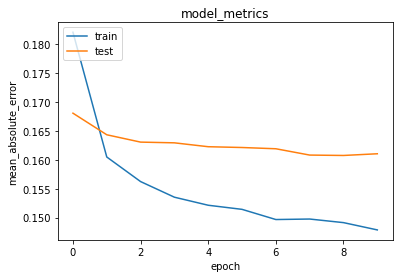

In [62]:
# Visualisasi Metrik
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model_metrics')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Mendapatkan Rekomendasi Film**

In [63]:
# mendefinisikan dataset
movie_df = movie_new
# df = pd.read_csv('rating.csv')
 
# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_visited_by_user = df[df.userId == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
movie_not_visited = movie_df[~movie_df['id'].isin(movie_visited_by_user.movieId.values)]['id'] 
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)
 
movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

In [64]:
# melakukan prediksi film rekomendasi terhadap rating
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Tampilkan rekomendasi untuk pengguna: {}'.format(user_id))
print('===' * 9)
print('Film dengan rating tertinggi untuk pengguna')
print('----' * 8)
 
top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)
 
print('----' * 8)
print('Top 10 film recommendation')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

Tampilkan rekomendasi untuk pengguna: 122
Film dengan rating tertinggi untuk pengguna
--------------------------------
Beauty of the Day (Belle de jour) (1967) : Drama
Like Water for Chocolate (Como agua para chocolate) (1992) : Drama|Fantasy|Romance
Boot, Das (Boat, The) (1981) : Action|Drama|War
Raise the Red Lantern (Da hong deng long gao gao gua) (1991) : Drama
Welcome to Sarajevo (1997) : Drama|War
--------------------------------
Top 10 film recommendation
--------------------------------
Boys of St. Vincent, The (1992) : Drama
Casablanca (1942) : Drama|Romance
Maltese Falcon, The (1941) : Film-Noir|Mystery
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) : Drama|Film-Noir|Romance
All About Eve (1950) : Drama
Wallace & Gromit: The Wrong Trousers (1993) : Animation|Children|Comedy|Crime
One Flew Over the Cuckoo's Nest (1975) : Drama
12 Angry Men (1957) : Drama
Big Sleep, The (1946) : Crime|Film-Noir|Mystery
Man Who Would Be King, The (1975) : Adventure|Drama
